# [Think Stats, 2nd Edition](http://thinkstats2.com), Section 3.6 Exercises, Exercise 3.1


In [1]:
%matplotlib inline
import nsfg
import thinkstats2
import thinkplot

Loading the respondent data file:

In [2]:
resp = nsfg.ReadFemResp()

Let's see what the [NUMKDHH variable](https://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7868&srtLabel=606815) data histogram looks like:

Note: that the numkdhh value 5 is the code for 5 OR MORE kids!  Since I don't know that we have any idea for how the distribution of the number of kids above 5 looks and the number of families with 5 or more is fairly small, I'll interpret the numkdhh value of 5 as having ONLY 5 kids.  This will probably under estimate the number of kids and average family size since the original coding suggests some families may have more than 5 kids.

Writing ../images/Histogram of Number of Kids.png


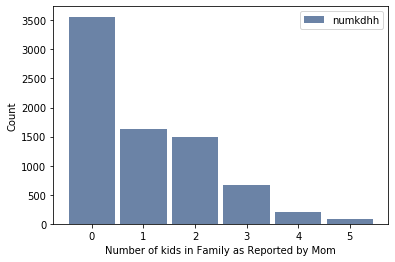

In [3]:
num_kids_reported_by_mother = resp.numkdhh
hist = thinkstats2.Hist(num_kids_reported_by_mother, label='numkdhh')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of kids in Family as Reported by Mom', 
                 ylabel='Count')
thinkplot.SaveFormat('../images/Histogram of Number of Kids', 
                     'png')

If each of the **kids** represented in the distribution above were asked how many kids are in their family, including themselves, the new, biased distribution would look like this:

Writing ../images/Biased Histogram of Number of Kids.png


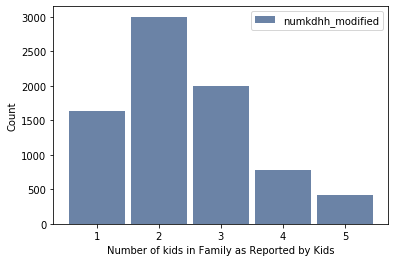

In [4]:
from collections import defaultdict
hist2 = defaultdict(int)
for n in hist:
    if n > 0:
        hist2[n] = hist[n]*n
hist2 = thinkstats2.MakeHistFromDict(hist2, label='numkdhh_modified')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='Number of kids in Family as Reported by Kids', 
                 ylabel='Count')
thinkplot.SaveFormat('../images/Biased Histogram of Number of Kids', 
                     'png')

Converting the histograms into probability mass functions and plotting shows:

Writing ../images/PMF Comparison.png


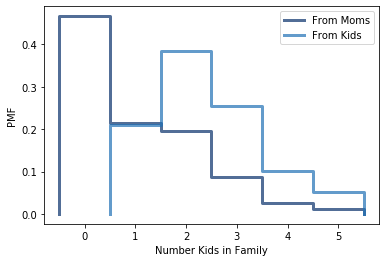

In [5]:
num_kids_pmf = thinkstats2.MakePmfFromHist(hist, label='From Moms')
num_kids_biased_pmf = thinkstats2.MakePmfFromHist(hist2, label="From Kids")
thinkplot.Pmfs([num_kids_pmf, num_kids_biased_pmf])
thinkplot.Config(xlabel='Number Kids in Family', ylabel='PMF')
thinkplot.SaveFormat('../images/PMF Comparison', 'png')

In [6]:
print('Mean # of kids as reported by Mom: {0:1.2f}'.format(num_kids_pmf.Mean()))
print('Biased mean # of kids as reported by kids: {0:1.2f}'.format(num_kids_biased_pmf.Mean()))

Mean # of kids as reported by Mom: 1.02
Biased mean # of kids as reported by kids: 2.40
